In [1]:
#!pip install wget
import pandas as pd
import numpy as np
import requests 
import os
import wget
import matplotlib.pyplot as plt

In [2]:
#Urls
country_data_url="https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/mar-2022/6291001.xlsx"
state_data_url="https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/mar-2022/6291002.xlsx"
industry_data_url="https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/mar-2022/6291004.xlsx"


In [3]:
#Get xlsx file
country_data_filename=wget.download(country_data_url)
state_data_filename=wget.download(state_data_url)
industry_data_filename=wget.download(industry_data_url)



In [4]:
#############################Country Level
sheet_names=["Data2","Data3","Data4","Data5","Data6","Data7","Data8","Data9","Data10",]
country_data=pd.read_excel(country_data_filename,sheet_name="Data1")
country_data=country_data.drop(country_data.index[0:9])
for sheet in sheet_names:
    country_data_temp=pd.read_excel(country_data_filename,sheet_name=sheet)
    country_data_temp=country_data_temp.drop(country_data_temp.index[0:9])
    country_data=pd.merge(country_data,country_data_temp,on="Unnamed: 0",)
#df.drop(df.index[2])

In [6]:
#############################State Level
sheet_names=["Data2","Data3","Data4",]
state_data=pd.read_excel(state_data_filename,sheet_name="Data1")
state_data=state_data.drop(state_data.index[0:9])
for sheet in sheet_names:
    state_data_temp=pd.read_excel(state_data_filename,sheet_name=sheet)
    state_data_temp=state_data_temp.drop(state_data_temp.index[0:9])
    state_data=pd.merge(state_data,state_data_temp,on="Unnamed: 0",)

In [24]:
#############################Industry Level
industry_data=pd.read_excel(industry_data_filename,sheet_name="Data1")
industry_data=industry_data.drop(industry_data.index[0:9])


industry_data.columns

Index(['Unnamed: 0', 'Agriculture, Forestry and Fishing ;  Employed total ;',
       'Agriculture, Forestry and Fishing ;  Employed total ;.1',
       'Agriculture, Forestry and Fishing ;  Employed total ;.2',
       'Mining ;  Employed total ;', 'Mining ;  Employed total ;.1',
       'Mining ;  Employed total ;.2', 'Manufacturing ;  Employed total ;',
       'Manufacturing ;  Employed total ;.1',
       'Manufacturing ;  Employed total ;.2',
       'Electricity, Gas, Water and Waste Services ;  Employed total ;',
       'Electricity, Gas, Water and Waste Services ;  Employed total ;.1',
       'Electricity, Gas, Water and Waste Services ;  Employed total ;.2',
       'Construction ;  Employed total ;',
       'Construction ;  Employed total ;.1',
       'Construction ;  Employed total ;.2',
       'Wholesale Trade ;  Employed total ;',
       'Wholesale Trade ;  Employed total ;.1',
       'Wholesale Trade ;  Employed total ;.2',
       'Retail Trade ;  Employed total ;',
       'Reta

In [8]:
country_data=country_data.rename(columns={'Unnamed: 0':'Date','15-64 years ;  Employed total ;  Persons ;'
                                          :'15-64 years Employed total Persons',
                                         '15-64 years ;  Employed total ;  > Males ;':'15-64 years Employed total Males',
                                         '15-64 years ;  Employed total ;  > Females ;':'15-64 years Employed total Females'})
country_data['Date'] = country_data['Date'].astype('datetime64[ns]')
start_date = pd.to_datetime('01/01/2018 00:00')
country_data=country_data.loc[(country_data['Date'] >= start_date)]

country_data.head(100)

,Date,15-64 years Employed total Persons,15-64 years Employed total Males,15-64 years Employed total Females,15-64 years ; > Employed full-time ; Persons ;,15-64 years ; > Employed full-time ; > Males ;,15-64 years ; > Employed full-time ; > Females ;,15-64 years ; > Employed part-time ; Persons ;,15-64 years ; > Employed part-time ; > Males ;,15-64 years ; > Employed part-time ; > Females ;,...,65 years and over ; Not in the labour force (NILF) ; Married ; > Females ;,65 years and over ; Not in the labour force (NILF) ; Not married ; Persons ;,65 years and over ; Not in the labour force (NILF) ; Not married ; > Males ;,65 years and over ; Not in the labour force (NILF) ; Not married ; > Females ;,65 years and over ; Civilian population aged 15 years and over ; Married ; Persons ;,65 years and over ; Civilian population aged 15 years and over ; Married ; > Males ;,65 years and over ; Civilian population aged 15 years and over ; Married ; > Females ;,65 years and over ; Civilian population aged 15 years and over ; Not married ; Persons ;,65 years and over ; Civilian population aged 15 years and over ; Not married ; > Males ;,65 years and over ; Civilian population aged 15 years and over ; Not married ; > Females ;
479,2018-01-01,11809.439753,6256.299478,5553.140275,8223.878432,5164.589121,3059.28931,3585.561322,1091.710357,2493.850965,...,898.799492,1390.287361,433.176944,957.110417,2334.664655,1315.722054,1018.942601,1523.639345,490.344946,1033.294399
480,2018-02-01,12000.937561,6341.947996,5658.989566,8382.01197,5275.740637,3106.271334,3618.925591,1066.207359,2552.718232,...,893.97945,1399.685852,445.537673,954.148179,2326.712174,1303.315791,1023.396383,1542.969826,508.166209,1034.803617
481,2018-03-01,11971.053443,6317.90003,5653.153412,8253.4845,5214.407684,3039.076816,3717.568943,1103.492347,2614.076596,...,890.243422,1401.704006,440.675892,961.028114,2338.483964,1319.04675,1019.437214,1542.571036,497.86525,1044.705786
482,2018-04-01,11996.056688,6332.543182,5663.513506,8280.221741,5218.583166,3061.638575,3715.834947,1113.960016,2601.874931,...,889.849662,1415.018152,448.102637,966.915515,2329.316203,1313.192808,1016.123395,1562.106797,508.655192,1053.451605
483,2018-05-01,12039.327865,6339.918558,5699.409307,8278.500138,5227.293971,3051.206167,3760.827727,1112.624587,2648.20314,...,895.77906,1413.892007,445.614261,968.277746,2340.321067,1319.635706,1020.685361,1561.466933,507.180294,1054.286639
484,2018-06-01,12066.096379,6341.465901,5724.630479,8301.125726,5231.312864,3069.812862,3764.970654,1110.153037,2654.817617,...,900.539141,1400.950465,435.922329,965.028136,2361.326415,1333.457512,1027.868904,1550.829585,498.295488,1052.534096
485,2018-07-01,12032.909352,6346.749069,5686.160283,8362.690065,5257.810996,3104.879069,3670.219287,1088.938073,2581.281214,...,903.850464,1409.786008,438.51579,971.270218,2375.879801,1337.31359,1038.56621,1545.908199,498.92641,1046.98179
486,2018-08-01,12002.898804,6328.579018,5674.319787,8311.421106,5233.470987,3077.950119,3691.477698,1095.108031,2596.369668,...,923.348282,1395.628484,433.844588,961.783896,2390.759258,1345.27724,1045.482017,1540.659742,495.45176,1045.207983
487,2018-09-01,12068.249476,6367.284911,5700.964565,8367.79001,5266.500824,3101.289185,3700.459467,1100.784087,2599.67538,...,924.281581,1396.77913,438.692822,958.086307,2405.399248,1349.095036,1056.304212,1535.651752,496.117964,1039.533788
488,2018-10-01,12102.759352,6372.79304,5729.966312,8410.517422,5287.823455,3122.693967,3692.24193,1084.969585,2607.272346,...,926.349094,1397.20324,436.657863,960.545377,2413.304554,1354.129976,1059.174578,1538.954446,496.301024,1042.653422


In [26]:
industry_data=industry_data=industry_data.rename(columns={'Unnamed: 0':'Date','Agriculture, Forestry and Fishing ; Employed total ;.1'
                                          :'Agriculture, Forestry and Fishing ; Employed total',
                                         'Mining ; Employed total ;.1':'Mining ;  Employed total',
                                         'Manufacturing ; Employed total ;.1':'Manugacturing ;  Employed total ','Electricity, Gas, Water and Waste Services ;  Employed total ;.1':'Electricity' })
industry_data['Date'] = industry_data['Date'].astype('datetime64[ns]')
start_date = pd.to_datetime('01/01/2018 00:00')
industry_data=industry_data.loc[(industry_data['Date'] >= start_date)]


industry_data.columns

Index(['Date', 'Agriculture, Forestry and Fishing ;  Employed total ;',
       'Agriculture, Forestry and Fishing ;  Employed total ;.1',
       'Agriculture, Forestry and Fishing ;  Employed total ;.2',
       'Mining ;  Employed total ;', 'Mining ;  Employed total ;.1',
       'Mining ;  Employed total ;.2', 'Manufacturing ;  Employed total ;',
       'Manufacturing ;  Employed total ;.1',
       'Manufacturing ;  Employed total ;.2',
       'Electricity, Gas, Water and Waste Services ;  Employed total ;',
       'Electricity',
       'Electricity, Gas, Water and Waste Services ;  Employed total ;.2',
       'Construction ;  Employed total ;',
       'Construction ;  Employed total ;.1',
       'Construction ;  Employed total ;.2',
       'Wholesale Trade ;  Employed total ;',
       'Wholesale Trade ;  Employed total ;.1',
       'Wholesale Trade ;  Employed total ;.2',
       'Retail Trade ;  Employed total ;',
       'Retail Trade ;  Employed total ;.1',
       'Retail Trade ;  Em

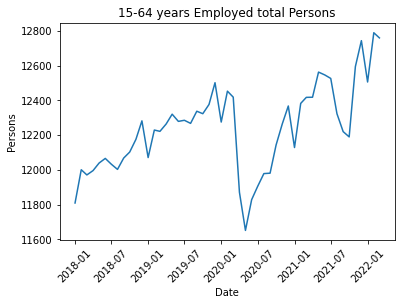

In [10]:
plt.plot(country_data["Date"], country_data["15-64 years Employed total Persons"])
plt.title('15-64 years Employed total Persons')
plt.xlabel('Date')
plt.ylabel('Persons')
plt.xticks(rotation=45)
plt.show()

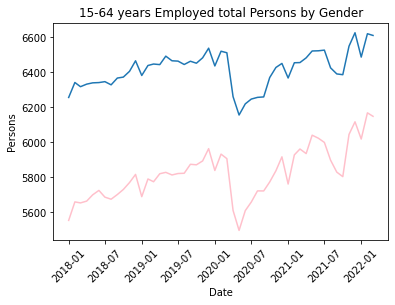

In [11]:
plt.plot(country_data["Date"], country_data["15-64 years Employed total Males"])
plt.plot(country_data["Date"], country_data["15-64 years Employed total Females"],color="pink")
plt.title('15-64 years Employed total Persons by Gender')
plt.xlabel('Date')
plt.ylabel('Persons')
plt.xticks(rotation=45)

plt.show()

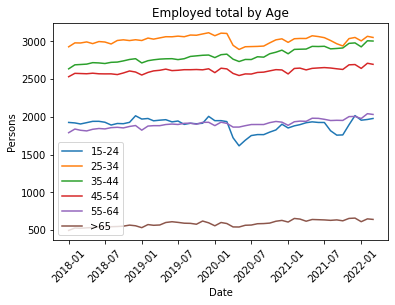

In [12]:
plt.plot(country_data["Date"], country_data["> 15-24 years ;  Employed total ;  Persons ;"], label="15-24")
plt.plot(country_data["Date"], country_data["> 25-34 years ;  Employed total ;  Persons ;"], label="25-34")
plt.plot(country_data["Date"], country_data["> 35-44 years ;  Employed total ;  Persons ;"], label="35-44")
plt.plot(country_data["Date"], country_data["> 45-54 years ;  Employed total ;  Persons ;"], label="45-54")
plt.plot(country_data["Date"], country_data["> 55-64 years ;  Employed total ;  Persons ;"], label="55-64")
plt.plot(country_data["Date"], country_data["65 years and over ;  Employed total ;  Persons ;"], label=">65")
plt.legend()
plt.title('Employed total by Age')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Persons')
plt.show()

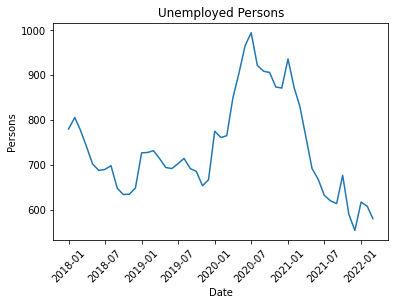

In [15]:
plt.plot(country_data["Date"], country_data["Unemployed total ;  Persons ;"])
plt.title('Unemployed Persons')
plt.xlabel('Date')
plt.ylabel('Persons')
plt.xticks(rotation=45)
plt.show()

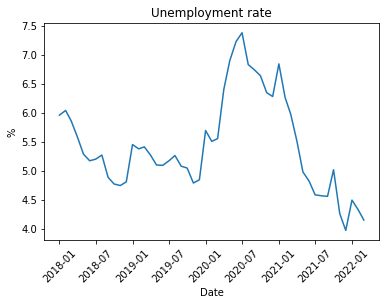

In [16]:
plt.plot(country_data["Date"], country_data["Unemployment rate ;  Persons ;"])
plt.title('Unemployment rate')
plt.xlabel('Date')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.show()

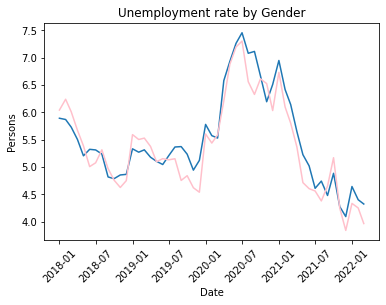

In [18]:
plt.plot(country_data["Date"], country_data["Unemployment rate ;  > Males ;"])
plt.plot(country_data["Date"], country_data["Unemployment rate ;  > Females ;"],color="pink")
plt.title('Unemployment rate by Gender')
plt.xlabel('Date')
plt.ylabel('Persons')
plt.xticks(rotation=45)
plt.show()

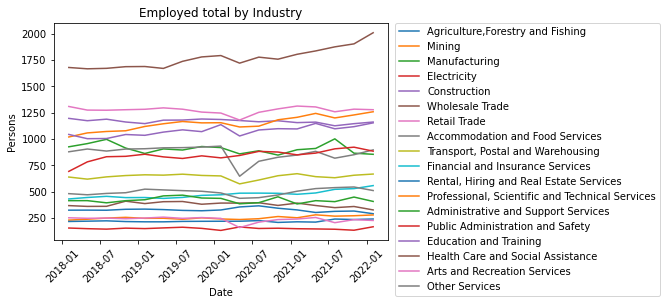

In [32]:
plt.plot(industry_data["Date"], industry_data['Agriculture, Forestry and Fishing ;  Employed total ;.1'], label="Agriculture,Forestry and Fishing")
plt.plot(industry_data["Date"], industry_data['Mining ;  Employed total ;.1'], label="Mining")
plt.plot(industry_data["Date"], industry_data['Manufacturing ;  Employed total ;.1'], label='Manufacturing')
plt.plot(industry_data["Date"], industry_data['Electricity'], label='Electricity')
plt.plot(industry_data["Date"], industry_data['Construction ;  Employed total ;.1'], label='Construction')
plt.plot(industry_data["Date"], industry_data['Wholesale Trade ;  Employed total ;.1'], label='Wholesale Trade')
plt.plot(industry_data["Date"], industry_data['Retail Trade ;  Employed total ;.1'], label='Retail Trade')
plt.plot(industry_data["Date"], industry_data['Accommodation and Food Services ;  Employed total ;.1'], label='Accommodation and Food Services')
plt.plot(industry_data["Date"], industry_data['Transport, Postal and Warehousing ;  Employed total ;.1'], label='Transport, Postal and Warehousing')
plt.plot(industry_data["Date"], industry_data['Financial and Insurance Services ;  Employed total ;.1'], label='Financial and Insurance Services')
plt.plot(industry_data["Date"], industry_data['Rental, Hiring and Real Estate Services ;  Employed total ;.1'], label='Rental, Hiring and Real Estate Services')
plt.plot(industry_data["Date"], industry_data['Professional, Scientific and Technical Services ;  Employed total ;.1'], label='Professional, Scientific and Technical Services')
plt.plot(industry_data["Date"], industry_data['Administrative and Support Services ;  Employed total ;.1'], label='Administrative and Support Services')
plt.plot(industry_data["Date"], industry_data['Public Administration and Safety ;  Employed total ;.1'], label='Public Administration and Safety')
plt.plot(industry_data["Date"], industry_data['Education and Training ;  Employed total ;.1'], label='Education and Training')
plt.plot(industry_data["Date"], industry_data['Health Care and Social Assistance ;  Employed total ;.1'], label='Health Care and Social Assistance')
plt.plot(industry_data["Date"], industry_data['Arts and Recreation Services ;  Employed total ;.1'], label='Arts and Recreation Services')
plt.plot(industry_data["Date"], industry_data['Other Services ;  Employed total ;.1'], label='Other Services')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Employed total by Industry')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Persons')
plt.show()